# HUMAN PPI 


### PIPELINE OVERVIEW
+ graph with genes as nodes and edges
+ generate a matrix from nodes based on specific parameters (features, random walk, shortest path..)
+ multidimensional matrices > embedding with tsne into 2D or 3D 
----------
+ Visualization typologies:
+ 2D PORTRAIT
+ 3D PORTRAIT
+ 3D LANDSCAPE
+ 3D SPHERE
----------

In [1]:
from multidimvis_main import *

In [2]:
organism = 'Human'

In [3]:
G = nx.read_edgelist('input/ppi_elist.txt',data=False)
# d_ent_sym, d_sym_ent = genent2sym()

d_gene_do = pickle.load( open( "input/d_gene_do.pkl", "rb" ) )
d_do_genes = pickle.load( open( "input/d_do_genes.pkl", "rb" ) )
d_do_names = pickle.load( open( "input/DO_names.pkl", "rb" ) )
d_names_do = {y:x for x,y in d_do_names.items()}

In [6]:
print('Number of nodes i.e. genes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.1f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

Number of nodes i.e. genes: 16376
Number of edges: 309355
Network density: 0.2%


_____
# DISTANCE MATRICES
_____

### + STRUCTURAL : Graph based

In [ ]:
DM_adj = pd.read_csv('output_csv/Adjacency_Dataframe_Human.csv', index_col=0)
DM_spl = pd.read_csv('output_csv/SPL_Dataframe_Human.csv', index_col=0)
DM_m = pd.read_csv('output_csv/RWR_Dataframe_Human.csv', index_col=0)

In [8]:
DM_m = pd.read_csv('output_csv/RWR_Dataframe_Yeast.csv', index_col=0)

In [9]:
DM_m

entrez gene/locuslink:853056  \
entrez gene/locuslink:853056                   8.047591e-01   
entrez gene/locuslink:850930                   1.554623e-02   
entrez gene/locuslink:854123                   7.044807e-07   
entrez gene/locuslink:856771                   5.456919e-07   
entrez gene/locuslink:851205                   6.068401e-06   
...                                                     ...   
biogrid:32106                                  8.328320e-09   
entrez gene/locuslink:2540578                  1.077954e-09   
entrez gene/locuslink:851514                   3.660478e-09   
entrez gene/locuslink:856436                   1.540188e-08   
entrez gene/locuslink:947286                   2.001912e-09   

                               entrez gene/locuslink:850930  \
entrez gene/locuslink:853056                   5.516404e-03   
entrez gene/locuslink:850930                   8.031988e-01   
entrez gene/locuslink:854123                   1.195437e-06   
entrez gene/locuslink:856771                   2.036070e-06   
entrez gene/locuslink:851205                   3.410937e-05   
...                                                     ...   
biogrid:32106                                  1.343630e-08   
entrez gene/locuslink:2540578                  1.195550e-09   
entrez gene/locuslink:851514                   1.230641e-08   
entrez gene/locuslink:856436                   2.386125e-08   
entrez gene/locuslink:947286                   1.065177e-08   

                               entrez gene/locuslink:854123  \
entrez gene/locuslink:853056                   2.421652e-07   
entrez gene/locuslink:850930                   1.158080e-06   
entrez gene/locuslink:854123                   8.033517e-01   
entrez gene/locuslink:856771                   5.063534e-03   
entrez gene/locuslink:851205                   5.081851e-03   
...                                                     ...   
biogrid:32106                                  9.742446e-08   
entrez gene/locuslink:2540578                  1.402175e-09   
entrez gene/locuslink:851514                   1.916307e-09   
entrez gene/locuslink:856436                   2.041593e-07   
entrez gene/locuslink:947286                   9.062813e-07   

                               entrez gene/locuslink:856771  \
entrez gene/locuslink:853056                   3.751632e-07   
entrez gene/locuslink:850930                   3.944885e-06   
entrez gene/locuslink:854123                   1.012707e-02   
entrez gene/locuslink:856771                   8.014095e-01   
entrez gene/locuslink:851205                   8.928409e-05   
...                                                     ...   
biogrid:32106                                  3.591960e-08   
entrez gene/locuslink:2540578                  1.132972e-09   
entrez gene/locuslink:851514                   2.335436e-09   
entrez gene/locuslink:856436                   3.773171e-07   
entrez gene/locuslink:947286                   7.236649e-05   

                               entrez gene/locuslink:851205  \
entrez gene/locuslink:853056                   1.483387e-06   
entrez gene/locuslink:850930                   2.349756e-05   
entrez gene/locuslink:854123                   3.613760e-03   
entrez gene/locuslink:856771                   3.174545e-05   
entrez gene/locuslink:851205                   8.008064e-01   
...                                                     ...   
biogrid:32106                                  1.130041e-07   
entrez gene/locuslink:2540578                  4.525556e-09   
entrez gene/locuslink:851514                   8.361571e-08   
entrez gene/locuslink:856436                   1.306673e-07   
entrez gene/locuslink:947286                   8.203039e-08   

                               entrez gene/locuslink:851882  \
entrez gene/locuslink:853056                   1.080123e-07   
entrez gene/locuslink:850930                   1.615603e-06   
entrez gene/locuslink:854123                   8.365255e-

### + STRUCTURAL : Centrality measures

In [121]:
# precalculated import
df_centralities = pd.read_csv('output_csv/Features_centralities_Dataframe_'+organism+'.csv', index_col=0)

d_deghubs = dict(zip(G.nodes(),df_centralities['degs']))
d_clos = dict(zip(G.nodes(), df_centralities['clos']))
d_betw = dict(zip(G.nodes(), df_centralities['betw']))
d_eigen = dict(zip(G.nodes(), df_centralities['eigen']))

d_centralities = dict(zip(list(G.nodes),zip(d_deghubs.values(),d_clos.values(),d_betw.values(),d_eigen.values())))
l_features = []
for i in d_centralities.items():
    k=list(i)
    l_features.append(k)
    
DM_centralities = pd.DataFrame(distance.squareform(distance.pdist(df_centralities, 'euclidean')))

### + FUNCTIONAL : Molecular Function

In [ ]:
DM_MF = pd.read_csv('output_csv/DistanceMatrix_goMF_Dataframe_'+organism+'.csv', index_col=0)

DM_MF_mod = DM_MF.round(decimals=2)

In [ ]:
DM_MF = DM_MF_mod

### + FUNCTIONAL : Cellular Components

In [5]:
DM_CC = pd.read_csv('output_csv/DistanceMatrix_goCC_Dataframe_'+organism+'.csv', index_col=0)

In [15]:
DM_CC_mod = DM_CC.round(decimals=2)

1     2     9    10    12    13    14    15    16    18  ...  \
1          0.00  2.24  3.00  3.00  2.24  3.00  3.46  3.32  3.32  3.32  ...   
2          2.24  0.00  2.00  2.00  2.45  2.45  2.65  2.45  2.45  2.83  ...   
9          3.00  2.00  0.00  0.00  3.16  1.41  1.73  1.41  2.00  2.00  ...   
10         3.00  2.00  0.00  0.00  3.16  1.41  1.73  1.41  2.00  2.00  ...   
12         2.24  2.45  3.16  3.16  0.00  3.16  3.61  3.46  3.46  3.46  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
107984208  2.65  2.45  1.41  1.41  2.83  1.41  2.24  2.00  2.45  2.00  ...   
107987462  3.32  2.83  2.00  2.00  3.46  2.00  2.65  2.45  2.83  2.45  ...   
107987491  3.74  3.00  2.24  2.24  3.61  2.65  2.83  2.65  3.00  3.00  ...   
109703458  3.32  2.83  2.00  2.00  3.46  2.00  2.65  2.45  2.45  1.41  ...   
110117499  3.00  2.45  1.41  1.41  3.16  1.41  2.24  2.00  2.45  2.00  ...   

           102724159  102724334  102724428  105371242  107983988  107984208  \
1               3.16       3.16       3.32       3.00       3.00       2.65   
2               2.65       2.65       2.83       2.45       2.45       2.45   
9               1.73       1.73       2.00       1.41       1.41       1.41   
10              1.73       1.73       2.00       1.41       1.41       1.41   
12              3.32       3.00       3.16       3.16       3.16       2.83   
...              ...        ...        ...        ...        ...        ...   
107984208       1.73       1.73       2.00       1.41       1.41       0.00   
107987462       2.24       2.65       2.45       2.00       2.00       2.00   
107987491       2.83       2.00       2.65       2.65       2.65       2.65   
109703458       2.24       2.65       2.45       1.41       2.00       2.00   
110117499       1.73       2.24       2.00       1.41       1.41       1.41   

           107987462  107987491  109703458  110117499  
1               3.32       3.74       3.32       3.00  
2               2.83       3.00       2.83       2.45  
9               2.00       2.24       2.00       1.41  
10              2.00       2.24       2.00       1.41  
12              3.46       3.61       3.46       3.16  
...              ...        ...        ...        ...  
107984208       2.00       2.65       2.00       1.41  
107987462       0.00       3.00       2.45       2.00  
107987491       3.00       0.00       2.65       2.65  
109703458       2.45       2.65       0.00       2.00  
110117499       2.00       2.65       2.00       0.00  

[15418 rows x 15418 columns]

In [8]:
df_CC_raw = pd.read_csv('input/GO_CC.csv')

df_CC_mod = df_CC_raw.drop(['evidence'],axis=1)
d_CC_gene_goids = df_CC_mod.groupby('entrezid')['go_id'].apply(list).to_dict()
d_CC_goid_genes = df_CC_mod.groupby('go_id')['entrezid'].apply(list).to_dict()

### + FUNCTIONAL : Biological Processes

In [ ]:
DM_BP = pd.read_csv('output_csv/DistanceMatrix_goBP_Dataframe_'+organism+'.csv', index_col=0)

In [ ]:
DM_BP_mod = DM_BP.round(decimals=2)

#### + Biological Processes - felix layout

In [6]:
f_bio = pd.read_csv('input/felix/ppi_layout_2_bio.csv',index_col=0, header=None, names = ['X','Y','Z','r','g','b'])

### + FUNCTIONAL : Disease Annotation

In [ ]:
DM_Disease = pd.read_csv('output_csv/DistanceMatrix_Disease_Dataframe_'+organism+'.csv', index_col=0)
genes_dis = list(DM_Disease.index)

In [ ]:
DM_Disease_mod = DM_Disease.round(decimals=2)

_____

### SELECT DISTANCE MATRIX

In [6]:
# G R A P H - B A S E D 
#feature = 'aij'
#DM = DM_adj

#feature = 'spl'
#DM = DM_spl

#feature = 'rwr'
#DM = DM_m

# C E N T R A L I T I E S
#feature = 'centralities'
#DM = DM_centralities


# D I S E A S E S 
#feature = 'disease'
#DM = DM_Disease 


# G O T E R M S (MF; BP; CC)
#feature = 'MF'
#DM = DM_MF

#feature = 'BP'
#DM = DM_BP

#feature = 'CC'
#DM = DM_CC

### IMPORT LAYOUTS

In [21]:
df_posG = pd.read_csv('output_csv/3DPortrait_tsne_rwr_Human_prplxt50_dens1.2_lrate5000_steps1000_cosine.csv', index_col=0)

X_tsne = list(df_posG['X'])
Y_tsne = list(df_posG['Y'])
Z_tsne = list(df_posG['Z'])

posG = dict(zip(list(G.nodes()),zip(X_tsne ,Y_tsne ,Z_tsne)))

____________
# PRE-SETTINGS
____________

### GENE ID to SYN (e.g. HOVERINFO for nodes)

In [6]:
entrez_syn = pd.read_csv('input/entrezid_syn.csv', index_col=0)
d_entrez_syn = dict(zip(entrez_syn.index,entrez_syn['db_synonym']))

d_gene2syn = {}
for k,v in d_entrez_syn.items():
    try:
        if k in G.nodes():
            d_gene2syn[k] = v
    except: 
           d_gene2syn['None'] = 'no entry'
            
d_genes_withsyn = {}
for g in G.nodes():
    for k,v in d_gene2syn.items():
        if g == k:
            d_genes_withsyn[g] = v
            
d_genes_nosyn = {}
for gene in G.nodes():
    if gene not in d_genes_withsyn.keys():
        d_genes_nosyn[gene] = 'no entry'
        
d_genes_all = {**d_genes_withsyn, **d_genes_nosyn}
d_genes_syn_sorted = {key:d_genes_all[key] for key in G.nodes()}

In [7]:
l_genes_syn=[]
for k,v in d_genes_syn_sorted.items():
    try:
        l_genes_syn.append(set(v.split('|')))
    except:
        l_genes_syn.append(v)

In [8]:
d_genes_syn_complete = {}
for i,v in enumerate(d_genes_syn_sorted.keys()):
    for idx,l in enumerate(l_genes_syn):
        if i==idx:
            d_genes_syn_complete[v] = l

In [9]:
l_features = list(d_genes_syn_complete.values())

### IBD Genes

In [11]:
import ast 

IBD_genes = np.loadtxt("input/iei_hubness.txt", usecols=(0, 1), skiprows=1, dtype=str)

In [12]:
d_IBD_genes = {}
for i in IBD_genes:
    d_IBD_genes[i[0]] = i[1]

In [13]:
d_degs = dict(G.degree())
d_degs_sortbydegree = {k: v for k, v in sorted(d_degs.items(), key=lambda item: item[1], reverse=True)}

In [14]:
# dict with gene to syn
d_geneid_IBDsyn = {}
for g in d_IBD_genes.keys():
    for k,v in d_genes_syn_complete.items():
        try:
            for gene in v:
                if g == gene:
                    d_geneid_IBDsyn[k] = g
        except:
            pass
    
# dict with gene to syn
d_IBDsyn_geneid = {}
for g in d_IBD_genes.keys():
    for k,v in d_genes_syn_complete.items():
        try:
            for gene in v:
                if g == gene:
                    d_IBDsyn_geneid[g] = k
        except:
            pass

In [15]:
# DISEASE Association with IBD genes 

d_IBD_doids = {}
for g,doids in d_gene_do.items():
    for idx,syn in d_geneid_IBDsyn.items():
        if g == idx: 
            d_IBD_doids[syn] = doids

### NODE SIZE

In [73]:
size3d = 2

scalef= 0.01
#size3d = draw_node_degree(G, scalef)

In [17]:
#edge_color = 'grey'
edge_width = 2
opacity_nodes = 1
opacity_edges = 0.9

### COLOUR PARAMETERS + 3D ANNOTATIONS

+ COLOR SPECIFIC GENES (LIST)

In [75]:
def color_nodes_from_genelist(G, l_gene, colour):

    d_col = {}
    for node in l_genes:
        d_col[str(node)] = colour
            
    d_rest = {}
    for g in G.nodes():
        if g not in d_col.keys():
            d_rest[g] = 'dimgrey' # 'rgba(50,50,50,0.5'
                    
    d_allnodes_col = {**d_col, **d_rest}
    d_allnodes_col_sorted = {key:d_allnodes_col[key] for key in G.nodes()}

    colours = list(d_allnodes_col_sorted.values())
    
    return colours

In [82]:
feature = 'IBD'

# set list of genes with same color: 
l_genes = list(d_IBDsyn_geneid.values())

colours = color_nodes_from_genelist(G, l_genes, 'red')

# Annotation of one specific IBD Gene (NFKB1)

d_genes_coords = {}
for node,val in d_geneid_IBDsyn.items():
    for k,v in posG.items():
        if node == str(k):
            d_genes_coords[node] = v
            
g_x = []
g_y = []
g_z = []
for node,coords in d_genes_coords.items():
    g_x.append(coords[0])
    g_y.append(coords[1])
    g_z.append(coords[2])

# Choose Specific Gene to annotate 
geneid = '4790'
genesyn = d_geneid_IBDsyn['4790'] 

x_gene = posG[geneid][0]
y_gene = posG[geneid][1]
z_gene = posG[geneid][2]

annotations = [dict ( 
                x=x_gene,
                y=y_gene,            
                z=z_gene, 
                showarrow=True,
                text = 'IBD GENE: '+genesyn,
                ay = -100,
                ax = -100,
                opacity = 0.8,
                arrowhead = 0,
                arrowwidth = 0.5 ,
                arrowcolor = "white" 
            )]

+ COLOR A DISEASE CATEGORY 

In [83]:
# ----------------------------------------------------        
# get disease categories
# ----------------------------------------------------        
disease_categories = {}
for d_name in d_names_do.keys():
    #if d_name.find(disease_category) != -1:
        try:
            disease_categories[d_name,d_names_do[d_name]]=len(d_do_genes[d_names_do[d_name]])
            #print('specific disease: %s (%s) ; # associated genes: %s' %(d_name,d_names_do[d_name],len(d_do_genes[d_names_do[d_name]])))
        except:
            pass

# ----------------------------------------------------        
# search specific term + count of genes associated with disease 
# ----------------------------------------------------   
min_diseasegenes = 100
max_diseasegenes = 200
search_term = 'inflammatory'

for k,v in disease_categories.items():
    if v >= min_diseasegenes and v<= max_diseasegenes and search_term in k[0]:
        print(k)

('inflammatory bowel disease', 'DOID:0050589')


In [84]:
feature = 'DIS'

disease_category = 'inflammatory bowel disease'
disease_col = 'red'

disease_genes = get_disease_genes(G, d_names_do, d_do_genes, disease_category)
colours = color_diseasecategory(G, d_names_do, d_do_genes, disease_category, disease_col)

annotations = [dict(
                x=max(posG.values())[0],
                y=max(posG.values())[1],
                z=max(posG.values())[2],
                showarrow=True,
                text=disease_category,
                xanchor="right",
                ay=-100,
                ax=-100,
                opacity=0.8,
                arrowhead=0,
                arrowwidth=0.5,
                arrowcolor="white"
                )]

print('Genes associated with Disease "'+disease_category+'": ', len(disease_genes))

Genes associated with Disease "inflammatory bowel disease":  128


____________
# 2D 
____________

___
## PORTRAITS
___

### tSNE EMBEDDING 2D

In [ ]:
prplxty = 50 # range: 5-50 / default = 30
density = 1.2 # default 12.
l_rate = 200 # default 200.
steps = 250 # min 250

metric = 'euclidean'

In [ ]:
%%time 
tsne = embed_tsne_2D(DM, prplxty, density, l_rate, steps, metric)

In [ ]:
%%time 
posG_disease = get_posG_2D(genes_dis, tsne)

### work in progress: Disease annotation layout - how to plot rest nodes 

In [ ]:
# might be replaced by mapping rest nodes to some geometry 

coords_disease = list(posG_disease.values())

x_max = max(coords_disease)[0]
x_min = min(coords_disease)[0]
y_max = max(coords_disease)[1]
y_min = min(coords_disease)[1]

rand_coords = [(np.random.uniform(x_min,x_max), np.random.uniform(y_min,y_max)) for i in range(len(genes_rest))]

In [ ]:
import numpy.linalg as la

t = np.linspace(0,2*np.pi,len(genes_rest))
xc = 1*np.random.rand() #x-coordinate of center of circle 
yc = 1*np.random.rand() #y-coordinate of center of circle
r = 6*np.random.rand() + 0.5 #radius of circle

x = r*np.cos(t) + np.random.normal(scale = 1.0/7, size = len(t)) + xc  
y = r*np.sin(t) + np.random.normal(scale = 1.0/7, size = len(t)) + yc

In [ ]:
genes_rest = []
for g in G.nodes():
    if int(g) not in posG_disease.keys():
        genes_rest.append(str(g))
        
posG_rest = {}
for g in genes_rest:
    for c in rand_coords:
        posG_rest[str(g)] = c

posG_all = {**posG_disease, **posG_rest}
posG_tsne = {key:posG_all[key] for key in G.nodes()}

### 2D tSNE PORTRAITS

In [ ]:
plt.figure(figsize=(25,25))
plt.title(feature+' | t-SNE | Metric: '+metric, size= 16)

nx.draw_networkx_nodes(G, posG_tsne, edgecolors = node_edge_col, linewidths = 0.5, node_color=colours, node_size=size, alpha = opacity_nodes)
nx.draw_networkx_edges(G, pos = posG_tsne, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
#nx.draw_networkx_labels(G, pos = posG, font_size = fontsize_labels, font_color = 'black')
plt.box(False)

plt.savefig('output_plots/2Dtsne_'+feature+'_'+metric+'_'+organism+'.png')

plt.show()

### UMAP EMBEDDING 2D 
+https://umap-learn.readthedocs.io/en/latest/embedding_space.html

In [ ]:
n_neighbors = 10 # balance between local and global structure in the data
spread = 2.
min_dist = 0.5 # defines how dense points are stacked together 
n_components = 2 # for 2D

U = umap.UMAP(
        n_neighbors = n_neighbors,
        spread = spread,
        min_dist = min_dist,
        n_components = n_components,
        metric = metric)

In [ ]:
%%time 
umap = U.fit_transform(DM)
posG_umap = get_posG_2D(list(G.nodes(),umap)

### 2D UMAP PORTRAITS

In [ ]:
plt.figure(figsize=(25,25))
plt.title('PW dist EUCLIDEAN | UMAP | Metric: '+metric, size=16)

nx.draw_networkx_nodes(G, posG_umap_eucl, edgecolors = node_edge_col, linewidths = 0.5, node_color=colours, node_size=size, alpha = 1)
nx.draw_networkx_edges(G, pos = posG_umap_eucl, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
#nx.draw_networkx_labels(G, pos = posG_umap_spl, font_size = fontsize_labels, font_color = 'black')
plt.box(False)

plt.savefig('output_plots/2Dumap_eucl_'+metric+'_'+organism+'.png')

plt.show()

____________
# 3D
____________


___
## LANDSCAPES
___

In [ ]:
#dict_z = {key:d_essentiality_scores[key] for key in G.nodes()}
dict_z = {key:d_clos[key] for key in G.nodes()}

z_list = list(dict_z.values())

### tSNE

In [ ]:
%%time

tsne_x, tsne_y, tsne_z = get_coords_landscape(G, posG_tsne)
tsne_trace_z = get_trace_nodes_landscape(tsne_x, tsne_y, z_list, colours, size3d)
tsne_data = [tsne_trace_z] #,adj_edges]

In [ ]:
print('Perplexity:', prplxty)
print('Early Exaggeration:', density)
print('Learning rate:', l_rate)
print('Iterations:', steps)

fig = pgo.Figure()
for i in tsne_data:
    fig.add_trace(i)

fig.update_layout(template='plotly_dark', height = 1000, width = 2200)
#fig.update_layout(template=None, height = 1000, width = 2200)

py.iplot(fig)

plotly.offline.plot(fig_1, filename = 'output_plots/Landscapes_tsne_'+feature+'_'+metric+'_'+organism+'.html', auto_open=False)

### UMAP

In [ ]:
%%time

umap_x, umap_y, umap_z = get_coords_landscape(G, posG_umap_adj)
umap_trace_z = get_trace_nodes_landscape(umap_x, umap_y, z_list, colours, size3d)
umap_data = [umap_trace_z]

In [ ]:
print('# Neighbors: ', n_neighbors)
print('Spread: ', spread)
print('Min. Distance: ', min_dist)
print('Metric: ', metric)


fig = pgo.Figure()
for i in umap_data:
    fig.add_trace(i)

fig.update_layout(template='plotly_dark', height = 1000, width = 2200)
#fig.update_layout(template=None, height = 1000, width = 2200)

py.iplot(fig)

plotly.offline.plot(fig_1, filename = 'output_plots/Landscapes_umap_'+feature+'_'+metric+'_'+organism+'.html', auto_open=False)

### LANDSCAPE | EXPORT Coordinates x,y,z,rgba

In [ ]:
colours_r = []
colours_g = []
colours_b = []
colours_a = []
for i in colours:
    colours_r.append(i[0])
    colours_g.append(i[1])
    colours_b.append(i[2])
    colours_a.append(0.9)

In [ ]:
df_xyz_landscape_tsne = pd.DataFrame(posG_tsne, index=["x","y"]).T
df_xyz_landscape_tsne["z"] = z_list

df_xyz_landscape_tsne['r'] = colours_r
df_xyz_landscape_tsne['g'] = colours_g
df_xyz_landscape_tsne['b'] = colours_b
df_xyz_landscape_tsne['a'] = colours_a

df_xyz_landscape_tsne.to_csv(r'output_csv/landscape_tsne_XYZ_RGBA_'+feature+_'+organism+'.csv', index = True)

In [ ]:
df_xyz_landscape_umap = pd.DataFrame(posG_umap, index=["x","y"]).T
df_xyz_landscape_umap["z"] = z_list

df_xyz_landscape_umap['r'] = colours_r
df_xyz_landscape_umap['g'] = colours_g
df_xyz_landscape_umap['b'] = colours_b
df_xyz_landscape_umap['a'] = colours_a

df_xyz_landscape_umap.to_csv(r'output_csv/landscape_umap_XYZ_RGBA_'+feature+_'+organism+'.csv', index = True)

____
## PORTRAITS
____

In [25]:
prplxty3d = 30 # range: 5-50 / default = 30.#
density3d = 1.6 # default 12.
l_rate3d = 5000 # default 200.
steps3d = 1000 #min 250

#metric = 'correlation'
metric = 'cosine'

#### COLOR EDGES BASED ON GENE LIST

In [85]:
def color_edges_from_specnodes(G, l_nodes, color):

    edge_lst = []
    for node in l_nodes:
        for edge in G.edges():
            if node == edge[0] or node == edge[1]:
                edge_lst.append(edge)

    d_col_edges = {}
    for e in set(edge_lst):
        d_col_edges[e]=color

    return d_col_edges

In [86]:
d_edge_col = color_edges_from_specnodes(G, l_genes, 'red')
edge_color = list(d_edge_col.values())

In [87]:
def get_trace_spec_edges_only(l_spec_edge, posG, color_list):
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in l_spec_edge:
            x0, y0, z0 = posG[edge[0]]
            x1, y1, z1 = posG[edge[1]]
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_z.append(z0)
            edge_z.append(z1)
            edge_z.append(None)
    
        
    trace_edges = pgo.Scatter3d(
                        x = edge_x, 
                        y = edge_y, 
                        z = edge_z,
                        mode = 'lines', hoverinfo='none',
                        line = dict(width = 0.5, color = color_list),
                        opacity = 0.3
                )
    
    return trace_edges


In [88]:
tsne_edges = get_trace_spec_edges_only(list(d_edge_col.keys()), posG, 'blue')

In [89]:
tsne_nodes = get_trace_nodes_(posG, l_features, colours, size3d)

tsne_data = [tsne_edges, tsne_nodes]
#tsne_data = [tsne_nodes, trace_centers]
#tsne_data = [tsne_nodes]

Perplexity: 30
Early Exaggeration: 1.6
Learning rate: 5000
Iterations: 1000


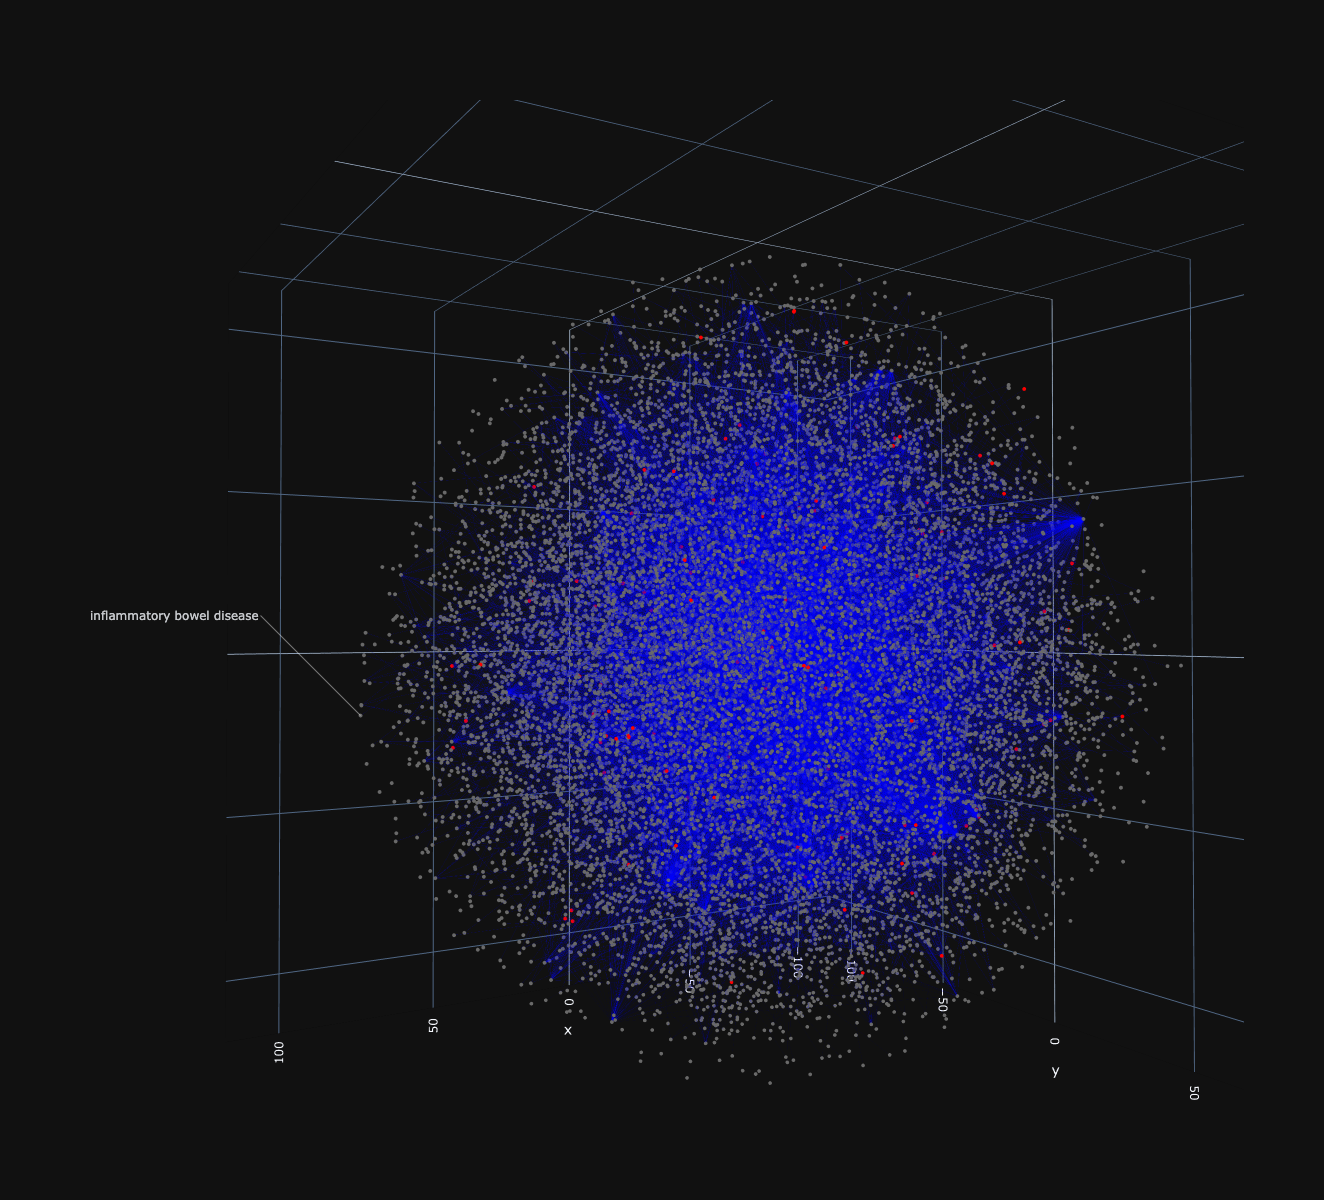

'output_plots/3Dportrait_tsne_DIS_cosine_Human.html'

In [90]:
print('Perplexity:', prplxty3d)
print('Early Exaggeration:', density3d)
print('Learning rate:', l_rate3d)
print('Iterations:', steps3d)

fig = pgo.Figure()
for i in tsne_data:
    fig.add_trace(i)
fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                    aspectratio=dict(
                        x=1,
                        y=1,
                        z=1
                    ),
                    camera=dict(
                        center=dict(
                            x=0,
                            y=0,
                            z=0
                        ),
                        eye=dict(
                            x=1.96903462608,
                            y=-1.09022831971,
                            z=0.405345349304
                        ),
                        up=dict(
                            x=0,
                            y=0,
                            z=1
                        )
                    ),
                    dragmode="turntable",
                    annotations=annotations,
                ))
py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dportrait_tsne_'+feature+'_'+metric+'_Human.html', auto_open=False)

In [ ]:
# TO DO :

# fix edges --> only plot the ones associtaed to disease
# search for hub (+which genes/disease are they)
# search for cluster (immuno def )

### WOrk in progress : Fix Edges shown = input: d_of_genes 

In [23]:
def color_disease_outgoingedges(G, l_majorcolor_nodes, color):
    
    d_col_major = {}
    for idx,n in enumerate(l_majorcolor_nodes):
            d_col_major[n] = color

    # Node outgoing edges
    edge_lst = []
    for edge in G.edges():
        for e in edge:
            for node in d_col_major.keys():
                if e == node:
                    edge_lst.append(edge)

    # Color edges based on major nodes
    d_col_edges = {}
    for e in edge_lst:
        for node,col in d_col_major.items():
            if e[0] == node:
                d_col_edges[e]=col
            elif e[1] == node:
                d_col_edges[e]=col
    
    return d_col_edges

In [29]:
d_edge_color = color_disease_outgoingedges(G, disease_genes, disease_col)

In [ ]:
#def get_trace_specific_edges(G, posG, d_edge_color):
    
edge_x = []
edge_y = []
edge_z = []
for edge in d_edge_color.keys():
    for e in posG.keys():
        if edge == e: 
            x0, y0, z0 = posG[edge[0]]
            x1, y1, z1 = posG[edge[1]]
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_z.append(z0)
            edge_z.append(z1)
            edge_z.append(None)

In [ ]:
trace_edges = pgo.Scatter3d(
                        x = edge_x, 
                        y = edge_y, 
                        z = edge_z,
                        mode = 'lines', hoverinfo='none',
                        line = dict(width = 0.5, color = list(d_edge_color.values())),
                        opacity = 0.6
                )

In [ ]:
trace_edges

In [ ]:
tsne_edges = trace_edges

#### UMAP

In [ ]:
n_neighbors = 10 # balance between local and global structure in the data
spread = 1.
min_dist = 0.1 # defines how dense points are stacked together 
metric='euclidean'

In [ ]:
%%time 
umap_posG3d = embed_umap_3D(G, DM, n_neighbors, spread, min_dist, metric)

In [ ]:
%%time 
#umap_edges = get_trace_edges(G, umap_posG3d_adj, edge_color) 
umap_nodes = get_trace_nodes(G, umap_posG3d_adj,  l_features, colours, size3d)

#umap_data = [umap_adj_edges, umap_adj_nodes]
umap_data = [umap_nodes]

In [ ]:
print('Perplexity:', prplxty3d)
print('Early Exaggeration:', density3d)
print('Learning rate:', l_rate3d)
print('Iterations:', steps3d)


fig = pgo.Figure()
for i in umap_data:
    fig.add_trace(i)
fig.update_layout(template='plotly_dark', showlegend=False, width=2000, height=2000)
py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dportrait_umap_'+feature+'_'+metric+'_'+organism+'.html', auto_open=False)

#### UMAP PORTRAIT EXPORT Coordinates

In [ ]:
# EXPORT as dataframe

df_3Dportrait_umap = pd.DataFrame(umap_posG3d).T
df_3Dportrait_umap.to_csv(r'output_csv/3DPortrait_umap_'+feature+'_'+organism+'_'+'lrate_'+l_rate3d+'steps_'+steps3d+'_'+metric+'.csv', index = True)

In [ ]:
# IMPORT and convert df to dict 
df_umap_posG3d = pd.read_csv('output_csv/3DPortrait_umap_'+feature+'_'+organism+'_'+'lrate_'+l_rate3d+'steps_'+steps3d+'_'+metric+'.csv', index_col=0)
X_umap = list(df_umap_posG3d['0'])
Y_umap = list(df_umap_posG3d['1'])
Z_umap = list(df_umap_posG3d['2'])

umap_posG3d = dict(zip(list(G.nodes()),zip(X_umap,Y_umap,Z_umap)))

## SPHERE

#### UMAP

In [ ]:
metric = 'cosine'

# Radius parameter
d_param = d_essentiality_scores_sorted

In [ ]:
%%time 
umap_sphere = embed_umap_sphere(G, DM, metric)
umap_sphere_withrad = get_posG_with_sphere_radius(G, umap_sphere, d_param)

In [ ]:
%%time
umap_sphere_trace_edges = get_trace_edges(G, umap_sphere_withrad, edge_color)
umap_sphere_trace_nodes = get_trace_umap_sphere(umap_sphere_withrad, l_features, colours, size3d)
umap_sphere_data = [umap_sphere_trace_edges, umap_sphere_trace_nodes]

In [ ]:
print('Metric:', metric)

fig = pgo.Figure()
for i in umap_sphere_data:
    fig.add_trace(i)
fig.update_layout(template='plotly_dark', showlegend=False, width=2000, height=2000)
py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dsphere_umap_'+feature+'_'+metric+'_'+organism+'.html', auto_open=False)

# ADDITIONAL STUFF

+ HUBS COLOURED

In [136]:
feature = 'HUBS'

df_centralities = pd.read_csv('output_csv/Features_centralities_Dataframe_Human.csv', index_col=0)

d_deghubs = dict(zip(G.nodes(),df_centralities['degs']))
d_clos = dict(zip(G.nodes(), df_centralities['clos']))
d_betw = dict(zip(G.nodes(), df_centralities['betw']))
d_eigen = dict(zip(G.nodes(), df_centralities['eigen']))

cutoff = 3 # number of considered hub nodes 
d_hub_nodes = identify_hubs(d_deghubs, d_clos, d_betw, cutoff)

colours = color_majornodes(G, d_hub_nodes)
#colours = color_nodes_from_dict(G,d_hub_nodes)
edge_color = color_majornodes_outgoingedges(G, d_hub_nodes)

# Annotations 

d_hub_coords = {}
for node,hub in d_hub_nodes.items():
    for k,v in posG.items():
        if node == str(k):
            d_hub_coords[node] = v
            
hub_x = []
hub_y = []
hub_z = []
for node,coords in d_hub_coords.items():
    hub_x.append(coords[0])
    hub_y.append(coords[1])
    hub_z.append(coords[2])
    
annotations = [dict(
                x=hub_x,
                y=hub_y,
                z=hub_z,
                showarrow=True,
                text="Hubs: "+str(i),
                xanchor="right",
                ay=-100,
                ax=-100,
                opacity=0.8,
                arrowhead=0,
                arrowwidth=0.5,
                arrowcolor="white"
                ) for i, hub_x, hub_y, hub_z in zip(range(1,len(d_hub_nodes)+1),hub_x, hub_y, hub_z)]

+ CLUSTERS COLOURED

In [73]:
feature = 'CLUS'

df_posG = pd.DataFrame(posG).T

n_clus = 15
n_iterations = 50

d_node_clusterid = get_node_clusterid(df_posG, n_clus, n_iterations)
cluster_center_x, cluster_center_y, cluster_center_z = get_clustercenter_xyz(df_posG, n_clus, n_iterations)

colours = color_nodes_from_dict(G, d_node_clusterid)

trace_centers = pgo.Scatter3d(x = cluster_center_x,
                             y = cluster_center_y,
                             z = cluster_center_z,
                                 mode = 'markers',
                                 marker=dict(
                                    size=3,
                                    color='lightgrey',
                                    opacity=1)
                                 )

annotations = [dict(
                x=xi,
                y=yi,
                z=zi,
                showarrow=True,
                text="Cluster: "+str(i),
                xanchor="right",
                ay=-100,
                ax=-100,
                opacity=0.8,
                arrowhead=0,
                arrowwidth=0.5,
                arrowcolor="white"
                ) for i, xi, yi, zi in zip(range(1,n_clus+1), cluster_center_x,cluster_center_y,cluster_center_z)]

+ CLOSENESS CENTRALITY COLOR 

In [ ]:
feature = 'CLOSE'

# Define colour parameter
d_to_be_coloured = d_clos # dict sorted by dict.values (that way the biggest value matches darkest colour of palette)


# Colouring
colour_groups = set(d_to_be_coloured.values())
colour_count = len(colour_groups)
palette = sns.color_palette('Reds', colour_count)

d_colourgroups = {}
for n in colour_groups:
    d_colourgroups[n] = [k for k in d_to_be_coloured.keys() if d_to_be_coloured[k] == n]
    
d_colourgroups_sorted = {key:d_colourgroups[key] for key in sorted(d_colourgroups.keys())}

d_val_col = {}
for idx,val in enumerate(d_colourgroups_sorted):
    for ix,v in enumerate(palette):
        if idx == ix:
            d_val_col[val] = v
d_node_colour = {}
for y in d_to_be_coloured.items(): # y[0] = node id, y[1] = val
    for x in d_val_col.items(): # x[0] = val, x[1] = (col,col,col)
        if x[0] == y[1]:
            d_node_colour[y[0]]=x[1]
            
# SORT dict based on G.nodes
d_node_colour_sorted = dict([(key, d_node_colour[key]) for key in G.nodes()])

l_col_clos = list(d_node_colour_sorted.values())

colours = l_col_clos 

### COLOURING SUBCATEGORIES e.g. Disease subcategory (i.e. functional property)

In [ ]:
# input = dict

n = len(sub_categories)
colors = generate_colorlist_nodes(n)

doid_coloured = {}
c=0
for k,v in sub_categories.items():
    doid_coloured[k[1]]=colors[c]
    c+=1
    
d_gene_colours = {}
for doid, gene in d_do_genes.items(): 
    for i in gene:
        for do, col in doid_coloured.items():
            if doid == do:
                d_gene_colours[i]=col

# SORT dict based on G.nodes
d_gene_colours_sorted = {key:d_gene_colours[key] for key in G.nodes()}

l_col_subcat = list(d_gene_colours_sorted.values())


# NODE COLOURING based on Subcategory
colours = l_col_subcat 
edge_color = 'lightgrey'

#sns.palplot(colours)

### COLOURING DISEASE SCORES

In [ ]:
# TO DO : MAKE FUNCTION FOR COLORING 

gene_list = gene_list_retisarc



# COLOURS GENERATED / disease score and neighboring nodes

n = len(gene_list)
color_major = generate_colorlist_nodes(n)
 
factor = 1.7 # the higher the lighter
color_minor = []
for i in color_major:
    r,g,b = hex_to_rgb(i)
    color_light = adjust_color_lightness(r,g,b,factor)
    color_minor.append(color_light)
    
    
# ------------------------------------------------------
# NODES coloured 

# Major nodes coloured
d_col_major = {}
for n in d_major_score.keys():
    for i in color_major:
        d_col_major[n] = i

d_col_minor = {}
for node,col in d_col_major.items():
    for node in d_col_major.keys():
        for nd,neigh in major_neigh.items():
            for n in neigh:
                for i in color_minor:
                    if node==nd and n not in d_col_major.keys():
                        d_col_minor[n] = i
                    
d_col = {**d_col_major,**d_col_minor}

d_grey = {}
for i in G.nodes():
    if i not in d_col.keys():
        d_grey[i] = 'lightgrey'
        
        
d_col_all = {**d_col_major, **d_col_minor, **d_grey}
d_col_all_sorted = {key:d_col_all[key] for key in G.nodes()}

l_col_all = list(d_col_all_sorted.values())

colours = l_col_all

# ------------------------------------------------------
# EDGES coloured 

edge_lst = []
for edge in G.edges():
    for e in edge:
        for node in d_col_major.keys():
            if e == node:
                edge_lst.append(edge)
                
d_col_edges = {}
for e in edge_lst:
    for node,col in d_col_major.items():
        if e[0] == node:
            d_col_edges[e]=col
        elif e[1] == node:
            d_col_edges[e]=col

d_grey_edges = {}
for edge in G.edges():
    if edge not in d_col_edges.keys(): 
        d_grey_edges[edge] = 'lightgrey'
        
d_edges_all = {**d_col_edges, **d_grey_edges}

# Sort according to G.edges()
d_edges_all_sorted = {key:d_edges_all[key] for key in G.edges()}

edge_color = list(d_edges_all_sorted.values())